## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [52]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import xgboost

from sklearn.model_selection import RandomizedSearchCV

In [73]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import backend
from keras import backend as K


# from keras.losses import mean_squared_error
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import pickle
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

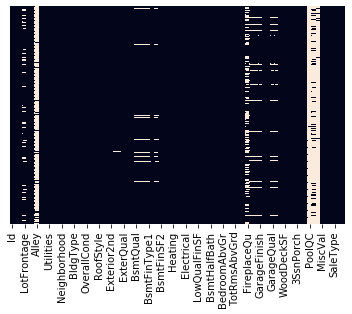

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'],axis=1,inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'],axis=1,inplace=True)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

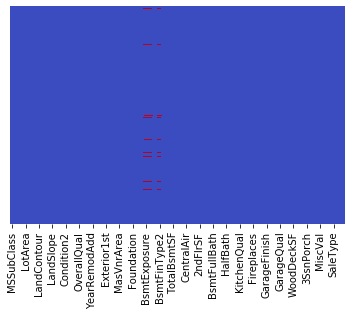

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [20]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

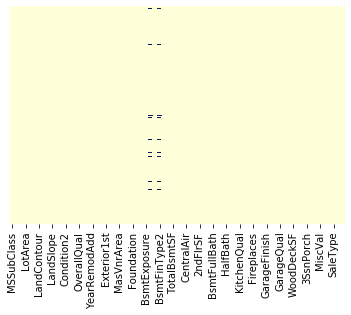

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [22]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(1422, 75)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [26]:
##HAndle Categorical Features

In [27]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [28]:
len(columns)

39

In [29]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [30]:
main_df=df.copy()

In [31]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [32]:
test_df.shape

(1459, 74)

In [33]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [34]:
final_df=pd.concat([df,test_df],axis=0)

In [35]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [36]:
final_df.shape

(2881, 75)

In [37]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [38]:
final_df.shape

(2881, 235)

In [39]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [40]:
final_df.shape

(2881, 175)

In [41]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [42]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [43]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [44]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [45]:
df_Train.shape, df_Test.shape

((1422, 175), (1459, 175))

In [46]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [47]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


## Prediciton and selecting the Algorithm

In [53]:

regressor=xgboost.XGBRegressor()

In [54]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [55]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [56]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [57]:
# random_cv.fit(X_train,y_train)

In [58]:
# random_cv.best_estimator_

In [59]:
# random_cv.best_estimator_

In [60]:
X_train.shape, y_train.shape

((1422, 174), (1422,))

In [61]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [62]:
regressor.fit(X_train,y_train)

[05:10:39] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[05:10:39] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[05:10:42] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:

filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [65]:
# df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [66]:
df_Test.shape

(1459, 174)

In [67]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [68]:
y_pred = regressor.predict(df_Test)
y_pred.shape

(1459,)

In [69]:
def create_submission_file( predict_val, filename = "test"):
    submission_df = pd.read_csv("sample_submission.csv")
    print(submission_df.shape)
    
    submission_df["SalePrice"] = y_pred
    submission_df.to_csv(filename + '.csv',index=False)
    
    return "Successful file created : " + filename
    

In [70]:
create_submission_file( y_pred, filename = "first")

(1459, 2)


'Successful file created : first'

## Step2

## Artificial Neural Network Implementation

In [74]:
# def root_mean_squared_error(y_true, y_pred):
#     return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

#both are right root_mean_squared_error


def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [99]:
def model_build_dl_1(X_train_val, y_train_val):
    model = Sequential()

    # Adding the input layer and the first hidden layer
    model.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))
    

    # Adding the second hidden layer
    model.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

    # Adding the third hidden layer
    model.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
    # Adding the output layer
    model.add(Dense(output_dim = 1, init = 'he_uniform'))

    # Compiling the ANN
    model.compile(loss=root_mean_squared_error, optimizer='Adamax')


    # Fitting the ANN to the Training set
#     model_history=model.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)
    model_history=model.fit(X_train_val, y_train_val,validation_split=0.20, batch_size = 10, nb_epoch = 100)
    
    return model
    

In [100]:
model_build_1 = model_build_dl_1(X_train.values, y_train.values)

TypeError: ('Keyword argument not understood:', 'init')

In [77]:
y_pred_1 = model_build_1.predict(df_Test)

NameError: name 'model_build_1' is not defined

In [108]:
create_submission_file( y_pred_1, filename = "forth_DL")

(1459, 2)


'Successful file created : forth_DL'

In [78]:
def model_build_dl_2(X_train_val, y_train_val):
    # Fitting the ANN to the Training set

    model = Sequential()
    model.add(Dense(128, input_shape = (X_train.shape[1], ), activation = 'relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(optimizer='sgd', loss='mse')
    
#     model_history = model.fit(X_train_val, y_train_val, epochs=200, batch_size=16, validation_split = 0.001, verbose=0)
    
    model_history_val = model.fit(X_train_val, y_train_val, epochs=10, batch_size=16, validation_split = 0.001)
#     model_history_val = model.fit(X_train_val, y_train_val, epochs=1000, batch_size=16, validation_split = 0.001)

    
    
    #     model_history=model.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)
    return model, model_history_val
    

In [79]:
model_build_2, model_history = model_build_dl_2(X_train.values, y_train.values)

Epoch 1/1000
89/89 [==============================] - 0s 4ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 2/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 3/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 4/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 5/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 6/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776718848.0000 - val_loss: 20977594368.0000
Epoch 7/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 8/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 9/1000
89/89 [====================

Epoch 69/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 70/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 71/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 72/1000
89/89 [==============================] - 0s 3ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 73/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 74/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 75/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 76/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 77/1000
89/89 [===========

89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 137/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776718848.0000 - val_loss: 20977594368.0000
Epoch 138/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 139/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 140/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 141/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 142/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 143/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 144/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 204/1000
89/89 [==============================] - 0s 1ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 205/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 206/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 207/1000
89/89 [==============================] - 0s 1ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 208/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 209/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 210/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 211/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 271/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 272/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776718848.0000 - val_loss: 20977594368.0000
Epoch 273/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 274/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 275/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 276/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 277/1000
89/89 [==============================] - 0s 1ms/step - loss: 39776718848.0000 - val_loss: 20977594368.0000
Epoch 278/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 338/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 339/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 340/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 341/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 342/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 343/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 344/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 345/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 405/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 406/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 407/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 408/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 409/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 410/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 411/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 412/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 472/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776694272.0000 - val_loss: 20977594368.0000
Epoch 473/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 474/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 475/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 476/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 477/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 478/1000
89/89 [==============================] - 0s 1ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 479/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 539/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 540/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 541/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 542/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 543/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 544/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 545/1000
89/89 [==============================] - 0s 3ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 546/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776718848.0000 - val_loss: 20977594368.0000
Epoch 606/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 607/1000
89/89 [==============================] - 0s 1ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 608/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 609/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 610/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 611/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 612/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 613/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 673/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 674/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 675/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 676/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 677/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 678/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 679/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 680/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 740/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 741/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 742/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 743/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 744/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 745/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776718848.0000 - val_loss: 20977594368.0000
Epoch 746/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776690176.0000 - val_loss: 20977594368.0000
Epoch 747/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 807/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 808/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 809/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 810/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 811/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 812/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 813/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 814/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 874/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 875/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776694272.0000 - val_loss: 20977594368.0000
Epoch 876/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 877/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 878/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 879/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 880/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 881/1000
89/89 [=================

89/89 [==============================] - 0s 2ms/step - loss: 39776702464.0000 - val_loss: 20977594368.0000
Epoch 941/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 942/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776710656.0000 - val_loss: 20977594368.0000
Epoch 943/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776698368.0000 - val_loss: 20977594368.0000
Epoch 944/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776714752.0000 - val_loss: 20977594368.0000
Epoch 945/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 946/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 947/1000
89/89 [==============================] - 0s 2ms/step - loss: 39776706560.0000 - val_loss: 20977594368.0000
Epoch 948/1000
89/89 [=================

In [81]:
y_pred_2 = model_build_2.predict(df_Test)
create_submission_file( y_pred_2, filename = "forth_DL_2")


(1459, 2)


'Successful file created : forth_DL_2'

In [82]:
model_build_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               22400     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 55,681
Trainable params: 55,681
Non-trainable params: 0
_________________________________________________________________


In [83]:
print('MSE of the training data: {}' .format(model_history.history['loss'][-1]))

MSE of the training data: 39776710656.0


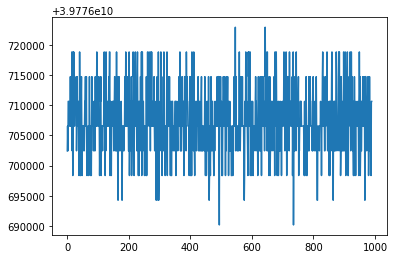

In [84]:
plt.plot(model_history.history['loss'][10:])

In [85]:
y_train_pred_2 = model_build_2.predict(X_train)
# print('MSE of training data: {}'.format(mean_squared_error(y_train, y_train_pred_2)))


#or
y_train_reshape = np.array(y_train).reshape(-1,1)
print('MSE of training data: {}'.format(mean_squared_error(y_train_reshape, y_train_pred_2)))

MSE of training data: 39750267240.07665


# Tuning Hyperparameter

In [86]:
# Function that creates our Keras model
def create_model(optimizer= 'adam' , activation= 'relu'):
    model = Sequential()
    model.add(Dense(128, input_shape=(336,), activation=activation))
    model.add(Dense(256, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='mse', metrics=["accuracy"])
    
    
    
    # Create a model as a sklearn estimator
#     model = KerasClassifier(build_fn=model, epochs=6, batch_size=16, verbose = 0)
    
    return model



In [87]:
model_hyperparameter = create_model()

In [88]:
# Create a model as a sklearn estimator
model_hyperparameter = KerasClassifier(build_fn=create_model, epochs=6, batch_size=16, verbose = 0)

In [90]:


# Define a series of parameters
params = dict(optimizer=['sgd','adam'],batch_size=[16, 32], activation=['relu','tanh', 'sigmoid', 'softmax'])

# Create a random search cv object and fit it to the data


# grid_search = GridSearchCV(estimator = model_hyperparameter,
#                        param_grid = params,
#                        scoring = 'accuracy',
#                        cv = 10)

# random_search_results = grid_search.fit(X_train, y_train, verbose=0)

random_search = RandomizedSearchCV(model_hyperparameter, param_distributions=params, cv=5)
random_search_results = random_search.fit(X_train, y_train, verbose=0)

ValueError: in user code:

    /home/rakesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    /home/rakesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/rakesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/rakesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/rakesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:531 train_step  **
        y_pred = self(x, training=True)
    /home/rakesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /home/rakesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_214 is incompatible with the layer: expected axis -1 of input shape to have value 336 but received input with shape [None, 174]
